[ 문자처리 방식 ]
- 토큰단위로 분리 
- 더미
- 0과1로 변환해서 처리 
- 카운팅 기반을 가진 식 

# 필수 라이브러리 로딩  

In [127]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import warnings
from IPython.display import Image

import os
os.environ["OMP_NUM_THREADS"] = '1'

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [46]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
%config Completer.use_jedi = False

mpl.rc('font', family='D2coding')
mpl.rc('axes', unicode_minus=False)

sns.set(font="malgun gothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc('figure', figsize=(10, 8))

# 데이터 로딩

In [85]:
data = pd.read_csv('C:/k_digital/source/data/spam.csv')
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# 탐색적 데이터 분석 : EDA

## target : 목표변수 or 종속변수 

In [4]:
data['target'].unique()

array(['ham', 'spam'], dtype=object)

- spam : 스팸문자 , pam : 일반문자 
- NLTK(natural language toolkit) : 자연어 처리를 위해 만든 도구(패키지)
- 주요기능 : 말뭉치, 토큰생성, 형태소 분석, 품사 태깅

In [48]:
data['target'].value_counts()

ham     4827
spam     747
Name: target, dtype: int64

## 말뭉치(corpus)
- 자연어 분석을 위해 만든 샘플 문서 집합

In [6]:
import nltk 
nltk.download('book')
from nltk.book import *

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\minim\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\minim\AppData\Roaming\nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\minim\AppData\Roaming\nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\minim\AppData\Roaming\nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\minim\AppData\Roaming\nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\minim\AppData\R

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [49]:
# gutenberg 말뭉치 : 저작권이 만료된 소설같은 작품들을 가지고 있는 문서 집합 
nltk.corpus.gutenberg.fileids()

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [50]:
shakespeare = nltk.corpus.gutenberg.raw('austen-emma.txt')
print(shakespeare[:500])

[Emma by Jane Austen 1816]

VOLUME I

CHAPTER I


Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence; and had lived nearly twenty-one years in the world
with very little to distress or vex her.

She was the youngest of the two daughters of a most affectionate,
indulgent father; and had, in consequence of her sister's marriage,
been mistress of his house from a very early period.  Her mother
had died t


## 토큰 생성 : 문자열을 가장 작은 단위인 토큰으로 나누는 작업

In [86]:
#from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize
print(word_tokenize(shakespeare[50:100]))

['Emma', 'Woodhouse', ',', 'handsome', ',', 'clever', ',', 'and', 'rich', ',', 'with', 'a']


In [87]:
from nltk.tokenize import RegexpTokenizer
# \w : 영문자, 숫자, _(밑줄)
re = RegexpTokenizer('[\w]+')
re.tokenize(shakespeare[50:100])


['Emma', 'Woodhouse', 'handsome', 'clever', 'and', 'rich', 'with', 'a']

## 형태소(morpheme) 분석

- 형태소 : 의미가 있는 가장 작은 말의 단위 
- 형태소 분석 : 단어에서 어근, 접두사, 접미사, 품사 같은 속성을 파악하는 작업 
- 기능
    1. 어간 추출(stemming) : 단어의 기본형
    2. 원형 복원(lemmatizing) : 같은 의미를 가진 여러 단어를 통합하는 작업
    3. 품사 부착(Part-Of-Speech tagging,POS)
    

[자주 사용하는 문자 클래스]
[0-9] 또는 [a-zA-Z] 등은 무척 자주 사용하는 정규 표현식이다. 이렇게 자주 사용하는 정규식은 별도의 표기법으로 표현할 수 있다. 다음을 기억해 두자.

\d - 숫자와 매치, [0-9]와 동일한 표현식이다.
\D - 숫자가 아닌 것과 매치, [^0-9]와 동일한 표현식이다.
\s - whitespace 문자와 매치, [ \t\n\r\f\v]와 동일한 표현식이다. 맨 앞의 빈 칸은 공백문자(space)를 의미한다.
\S - whitespace 문자가 아닌 것과 매치, [^ \t\n\r\f\v]와 동일한 표현식이다.
\w - 문자+숫자(alphanumeric)와 매치, [a-zA-Z0-9_]와 동일한 표현식이다.
\W - 문자+숫자(alphanumeric)가 아닌 문자와 매치, [^a-zA-Z0-9_]와 동일한 표현식이다.
대문자로 사용된 것은 소문자의 반대임을 추측할 수 있다.


In [88]:
from nltk.stem import PorterStemmer, LancasterStemmer

st1 = PorterStemmer()
st2 = LancasterStemmer()

words = ['fly', 'flies', 'flying', 'flew', 'flown']

    
print('Porter Stemmer : ' , [st1.stem(w) for w in words])
print('Lancaster Stemmer : ', [st2.stem(w) for w in words])

Porter Stemmer :  ['fli', 'fli', 'fli', 'flew', 'flown']
Lancaster Stemmer :  ['fly', 'fli', 'fly', 'flew', 'flown']


In [89]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\minim\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [90]:
from nltk.stem import WordNetLemmatizer
lm = WordNetLemmatizer()

[lm.lemmatize(w, pos = 'v') for w in words] # pos는 품사 - 조금 더 정확하게 찾아주기 위해 ! 

['fly', 'fly', 'fly', 'fly', 'fly']

In [91]:
nltk.help.upenn_tagset('VB')

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


In [92]:
from nltk.tag import pos_tag

text = '''
Emma Woodhouse, handsome, clever, and rich, with a comfortable home
and happy disposition, seemed to unite some of the best blessings
of existence
'''

# 품사를 붙이는 작업 <-- 단어 단위로 쪼개져있어야한다. 
tag_list = pos_tag(word_tokenize(text))
tag_list

[('Emma', 'NNP'),
 ('Woodhouse', 'NNP'),
 (',', ','),
 ('handsome', 'NN'),
 (',', ','),
 ('clever', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('rich', 'JJ'),
 (',', ','),
 ('with', 'IN'),
 ('a', 'DT'),
 ('comfortable', 'JJ'),
 ('home', 'NN'),
 ('and', 'CC'),
 ('happy', 'JJ'),
 ('disposition', 'NN'),
 (',', ','),
 ('seemed', 'VBD'),
 ('to', 'TO'),
 ('unite', 'VB'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('blessings', 'NNS'),
 ('of', 'IN'),
 ('existence', 'NN')]

In [93]:
nouns_list = [t[0] for t in tag_list if t[1] == 'NN']
nouns_list

['handsome', 'clever', 'home', 'disposition', 'existence']

# 전처리

## 특수문자(특수기호) 제거

In [94]:
# 파이썬에 내장된 패키지 string는 문자열을 처리하는 다양한 함수를 제공한다. 
import string

In [95]:
# 특수기호 목록 확인 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [96]:
data['text']

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5569    This is the 2nd time we have tried 2 contact u...
5570                 Will 체 b going to esplanade fr home?
5571    Pity, * was in mood for that. So...any other s...
5572    The guy did some bitching but I acted like i'd...
5573                           Rofl. Its true to its name
Name: text, Length: 5574, dtype: object

In [97]:
# 첫번째 문장을 가져와서 샘플에 담는다. 
sample = data['text'].loc[0]
sample

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [98]:
for i in sample:
    print(i)

G
o
 
u
n
t
i
l
 
j
u
r
o
n
g
 
p
o
i
n
t
,
 
c
r
a
z
y
.
.
 
A
v
a
i
l
a
b
l
e
 
o
n
l
y
 
i
n
 
b
u
g
i
s
 
n
 
g
r
e
a
t
 
w
o
r
l
d
 
l
a
 
e
 
b
u
f
f
e
t
.
.
.
 
C
i
n
e
 
t
h
e
r
e
 
g
o
t
 
a
m
o
r
e
 
w
a
t
.
.
.


In [99]:
# 특수문자 제거 
for i in sample:
    if i not in string.punctuation:
        print(i)

G
o
 
u
n
t
i
l
 
j
u
r
o
n
g
 
p
o
i
n
t
 
c
r
a
z
y
 
A
v
a
i
l
a
b
l
e
 
o
n
l
y
 
i
n
 
b
u
g
i
s
 
n
 
g
r
e
a
t
 
w
o
r
l
d
 
l
a
 
e
 
b
u
f
f
e
t
 
C
i
n
e
 
t
h
e
r
e
 
g
o
t
 
a
m
o
r
e
 
w
a
t


In [100]:
data.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [101]:
new_text = []
for i in sample:
    if i not in string.punctuation:
        new_text.append(i)
new_text

['G',
 'o',
 ' ',
 'u',
 'n',
 't',
 'i',
 'l',
 ' ',
 'j',
 'u',
 'r',
 'o',
 'n',
 'g',
 ' ',
 'p',
 'o',
 'i',
 'n',
 't',
 ' ',
 'c',
 'r',
 'a',
 'z',
 'y',
 ' ',
 'A',
 'v',
 'a',
 'i',
 'l',
 'a',
 'b',
 'l',
 'e',
 ' ',
 'o',
 'n',
 'l',
 'y',
 ' ',
 'i',
 'n',
 ' ',
 'b',
 'u',
 'g',
 'i',
 's',
 ' ',
 'n',
 ' ',
 'g',
 'r',
 'e',
 'a',
 't',
 ' ',
 'w',
 'o',
 'r',
 'l',
 'd',
 ' ',
 'l',
 'a',
 ' ',
 'e',
 ' ',
 'b',
 'u',
 'f',
 'f',
 'e',
 't',
 ' ',
 'C',
 'i',
 'n',
 'e',
 ' ',
 't',
 'h',
 'e',
 'r',
 'e',
 ' ',
 'g',
 'o',
 't',
 ' ',
 'a',
 'm',
 'o',
 'r',
 'e',
 ' ',
 'w',
 'a',
 't']

### join

In [102]:
# 연습
s = ['a','p','p','l','e']
''.join(s)

'apple'

In [103]:
# 문장형태로 합치기 
new_sample = []
for i in sample:
    if i not in string.punctuation:
        new_sample.append(i)
new_sample = ''.join(new_sample)
new_sample

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [104]:
# 특수문자 제거하고 문장 만드는거 함수 
def remove_punc(x):
    new_sample = []
    for i in x:
        if i not in string.punctuation:
            new_sample.append(i)
    new_sample = ''.join(new_sample)
    return new_sample

In [105]:
remove_punc(sample)

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [106]:
data['text'] = data['text'].apply(remove_punc)

In [107]:
data.head(3)

,target,text
0,ham,Go until jurong point crazy Available only in ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


## 전처리 - 불용어(stopword)
- 불용어 : 자연어 분석을 할 때 의미가 없는 단어 --> 제거하자
- 불용어 사전 : nltk


In [108]:
# 불용어 목록 확인
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\minim\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [109]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [110]:
stopwords.fileids() # 한국어가 없네 

['arabic',
 'azerbaijani',
 'basque',
 'bengali',
 'catalan',
 'chinese',
 'danish',
 'dutch',
 'english',
 'finnish',
 'french',
 'german',
 'greek',
 'hebrew',
 'hinglish',
 'hungarian',
 'indonesian',
 'italian',
 'kazakh',
 'nepali',
 'norwegian',
 'portuguese',
 'romanian',
 'russian',
 'slovene',
 'spanish',
 'swedish',
 'tajik',
 'turkish']

In [111]:
sample = data['text'].loc[0]
sample

'Go until jurong point crazy Available only in bugis n great world la e buffet Cine there got amore wat'

In [112]:
sample.split()

['Go',
 'until',
 'jurong',
 'point',
 'crazy',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet',
 'Cine',
 'there',
 'got',
 'amore',
 'wat']

In [113]:
# 소문자, 대문자 구분없게 하려고 lower
for w in sample.split():
    if w not in stopwords.words('english'):  # 불용어가 아니라면 
        print(w.lower())

go
jurong
point
crazy
available
bugis
n
great
world
la
e
buffet
cine
got
amore
wat


In [114]:
new_sample = []
for w in sample.split():
    if w.lower() not in stopwords.words('english'):
        new_sample.append(w.lower())
        
new_sample = ' '.join(new_sample)
new_sample

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

In [115]:
def stop_words(x):
    new_sample = []
    for w in x.split():
        if w.lower() not in stopwords.words('english'):
            new_sample.append(w.lower())

    new_sample = ' '.join(new_sample)
    return new_sample

In [116]:
data['text'] = data['text'].apply(stop_words)
data['text']

0       go jurong point crazy available bugis n great ...
1                                 ok lar joking wif u oni
2       free entry 2 wkly comp win fa cup final tkts 2...
3                     u dun say early hor u c already say
4             nah dont think goes usf lives around though
                              ...                        
5569    2nd time tried 2 contact u u 짙750 pound prize ...
5570                          체 b going esplanade fr home
5571                          pity mood soany suggestions
5572    guy bitching acted like id interested buying s...
5573                                       rofl true name
Name: text, Length: 5574, dtype: object

## 전처리 - 정형화 처리(target)
- 이진분류 

### map()

In [117]:
sample = pd.Series(['a','b','c'])
# map()
# zip()
sample.map({'a':'apple', 'b':'banana', 'c':'candy'})

0     apple
1    banana
2     candy
dtype: object

In [118]:
data['target'] = data['target'].map({'spam':1, 'ham':0})
data['target']

0       0
1       0
2       1
3       0
4       0
       ..
5569    1
5570    0
5571    0
5572    0
5573    0
Name: target, Length: 5574, dtype: int64

## 카운트 기반의 벡터화 처리 

- 카운트 기반 벡터화 : 문자를 개수 기반으로 벡터화하는 방식
- 테이터 전체에 존재하는 모든 단어들을 사전처럼 모은 다음에 각각의 인덱스를 부여하고, 
- 문장마다 속한 단어가 있는 인덱스를 카운트하는 방식이다. 

brown dog white cat brown bear : 0 (01 2)(02 1)
<br>
black dog 

???????????????????/

In [119]:
X = data['text']
y = data['target']

In [121]:
from sklearn.feature_extraction.text import CountVectorizer
# 객체 생성
cv = CountVectorizer()
# 모델 학습
cv.fit(X)
# 단어와 인덱스 출력
cv.vocabulary_

{'go': 3769,
 'jurong': 4671,
 'point': 6416,
 'crazy': 2471,
 'available': 1379,
 'bugis': 1848,
 'great': 3866,
 'world': 9171,
 'la': 4831,
 'buffet': 1846,
 'cine': 2186,
 'got': 3826,
 'amore': 1146,
 'wat': 8933,
 'ok': 5978,
 'lar': 4870,
 'joking': 4639,
 'wif': 9066,
 'oni': 6010,
 'free': 3555,
 'entry': 3137,
 'wkly': 9123,
 'comp': 2302,
 'win': 9080,
 'fa': 3274,
 'cup': 2527,
 'final': 3399,
 'tkts': 8366,
 '21st': 433,
 'may': 5318,
 '2005': 420,
 'text': 8201,
 '87121': 840,
 'receive': 6816,
 'questionstd': 6708,
 'txt': 8578,
 'ratetcs': 6760,
 'apply': 1232,
 '08452810075over18s': 71,
 'dun': 2988,
 'say': 7176,
 'early': 3008,
 'hor': 4200,
 'already': 1119,
 'nah': 5665,
 'dont': 2894,
 'think': 8277,
 'goes': 3783,
 'usf': 8727,
 'lives': 5033,
 'around': 1283,
 'though': 8296,
 'freemsg': 3563,
 'hey': 4095,
 'darling': 2591,
 'weeks': 8988,
 'word': 9157,
 'back': 1431,
 'id': 4321,
 'like': 4983,
 'fun': 3630,
 'still': 7843,
 'tb': 8131,
 'xxx': 9296,
 'std': 

In [122]:
X = cv.transform(X)
print(X)

  (0, 1146)	1
  (0, 1379)	1
  (0, 1846)	1
  (0, 1848)	1
  (0, 2186)	1
  (0, 2471)	1
  (0, 3769)	1
  (0, 3826)	1
  (0, 3866)	1
  (0, 4671)	1
  (0, 4831)	1
  (0, 6416)	1
  (0, 8933)	1
  (0, 9171)	1
  (1, 4639)	1
  (1, 4870)	1
  (1, 5978)	1
  (1, 6010)	1
  (1, 9066)	1
  (2, 71)	1
  (2, 420)	1
  (2, 433)	1
  (2, 840)	1
  (2, 1232)	1
  (2, 2302)	1
  :	:
  (5570, 3165)	1
  (5570, 3542)	1
  (5570, 3788)	1
  (5570, 4166)	1
  (5571, 5549)	1
  (5571, 6342)	1
  (5571, 7594)	1
  (5571, 7970)	1
  (5572, 964)	1
  (5572, 1632)	1
  (5572, 1883)	1
  (5572, 3080)	1
  (5572, 3555)	1
  (5572, 3679)	1
  (5572, 3928)	1
  (5572, 4321)	1
  (5572, 4458)	1
  (5572, 4983)	1
  (5572, 5760)	1
  (5572, 7619)	1
  (5572, 8717)	1
  (5572, 8983)	1
  (5573, 5671)	1
  (5573, 7036)	1
  (5573, 8524)	1


In [123]:
print(cv.vocabulary_['go'])

3769


In [124]:
print(cv.vocabulary_['jurong'])

4671


In [125]:
print(cv.vocabulary_['point'])

6416


# 모델링 및 예측/평가

## 데이터 세트 분리

In [128]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=100)

## MultinomialNB : 다항 분포에 대한 나이브 베이즈 알고리즘
- 정규분포(Gaussian)
- 베르누이분포(Bernoulli)

In [129]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)
pred = model.predict(X_test)

In [132]:
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score
# 정확도
cm = confusion_matrix(y_test, pred)
print(accuracy_score(y_test, pred))
print(f1_score(y_test, pred))

0.9856502242152466
0.943661971830986


<AxesSubplot:>

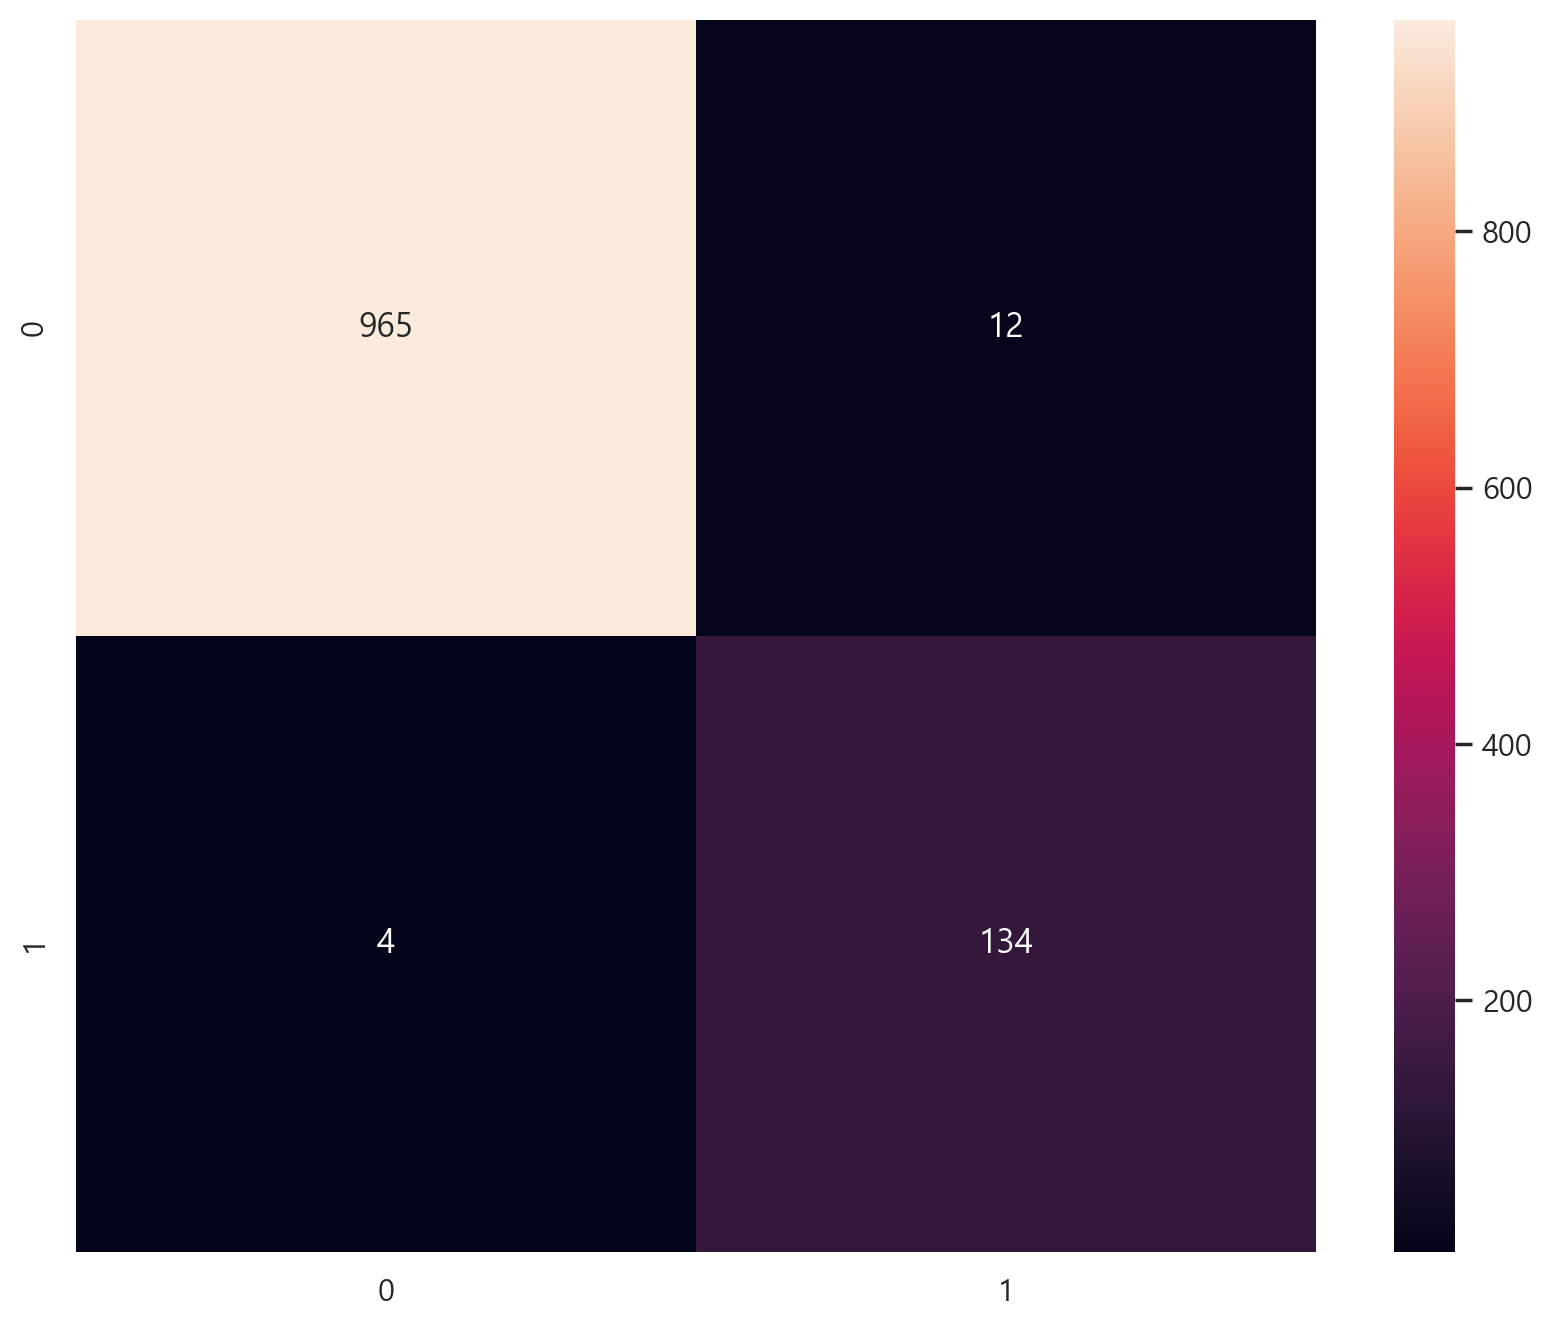

In [133]:
sns.heatmap(cm, annot=True, fmt='0.0f')